# Time-Series-Analysis-and-Forecasting-with-Python

In [4]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
# read the excel file
furniture = pd.read_excel(r"C:\Users\BORN2C~1\AppData\Local\Temp\Rar$DIa19252.49044\Sample - Superstore.xls")
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Preprocessing

In [8]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [9]:
# Sort the Order Date 
furniture = furniture.sort_values('Order Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

In [10]:
# grouping sales according to Order Date
furniture.groupby('Order Date')['Sales'].sum().reset_index()

# min and max values of Order Date
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [11]:
#set 'Order Date' as index
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [12]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

# Data Visualization

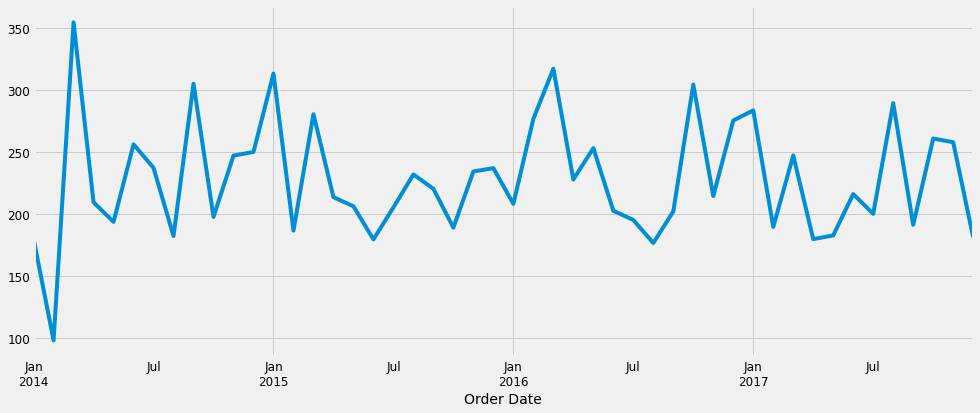

In [13]:
y.plot(figsize = (15, 6))
plt.show()

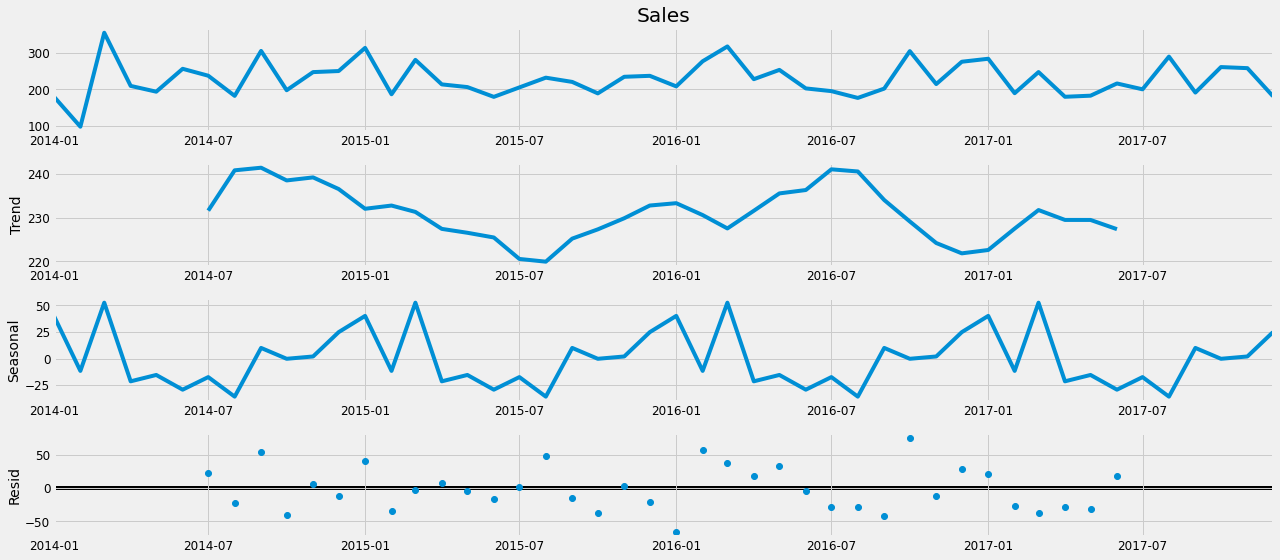

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA model

In [15]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1563.099811458757
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.074667847921


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:396.82026498081166
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131270145
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702922108848
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.7387013652834
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:397.7103607987713
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670619


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2271.2123142332903
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.0572383632067
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:398.3073903083777
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871085041
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641113186043
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.2652484385143
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:399.11662450993543
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537878


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1648.5343800725423
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987151293
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:411.7711868200262
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055299


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1975.3715600325993
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.1502241601413
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:413.03496182938983
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.24941907182153
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2030.9744604427108
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.56646108398377
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:393.23114179460737
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.0099455851329


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2301.675444046125
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.0933287553421
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:394.09066847832554
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048915697


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2197.9227675865995
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.0620300756257
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:398.3808815178719
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.927285794978
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727518
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.2757103427838
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:399.1471414739117


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9328127154166


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1817.90814043138
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.5034128343307
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:397.07526374394683


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.735548154541
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.7650834948868
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.0818242406477
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:397.9267379166298
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467267


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2024.2580795346705
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.05937080524365
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:402.6717666867977
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414869735


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2386.632120163208
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.85308065730135
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.4986580930953
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.56288669332446


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2406.791816183875
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.56190080714237
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:395.0251886261245
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.52247737023123


C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2264.7329043371346
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643704
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:395.8117139867811


# Fitting the ARIMA model

In [17]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1392   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


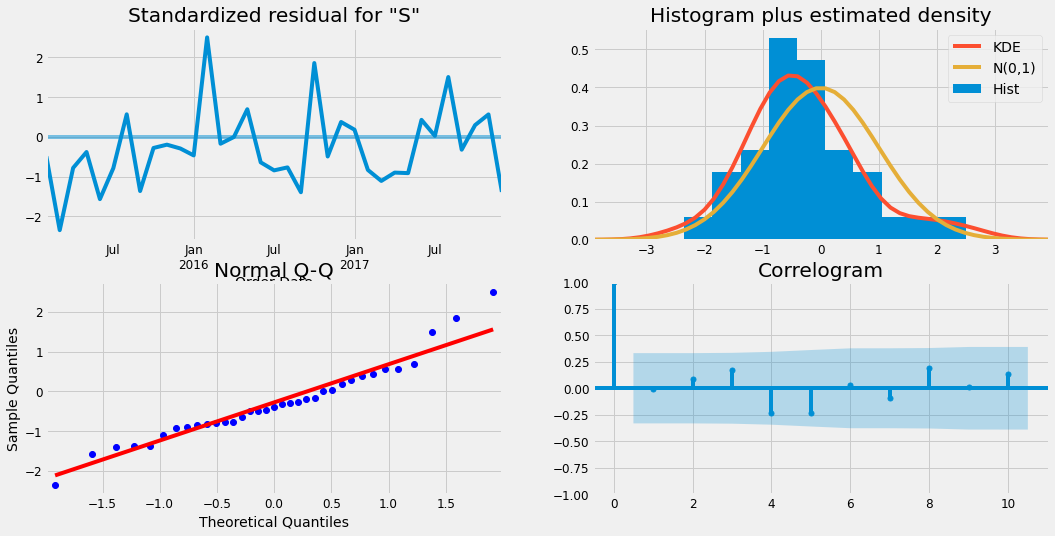

In [18]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [19]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949832,380.855434
2017-02-01,128.374778,341.873712
2017-03-01,201.126556,414.265413
2017-04-01,122.357193,335.174992
2017-05-01,126.153432,338.683176
2017-06-01,87.013283,299.283137
2017-07-01,92.953019,304.987209
2017-08-01,102.323362,314.142880
2017-09-01,103.098063,314.721215


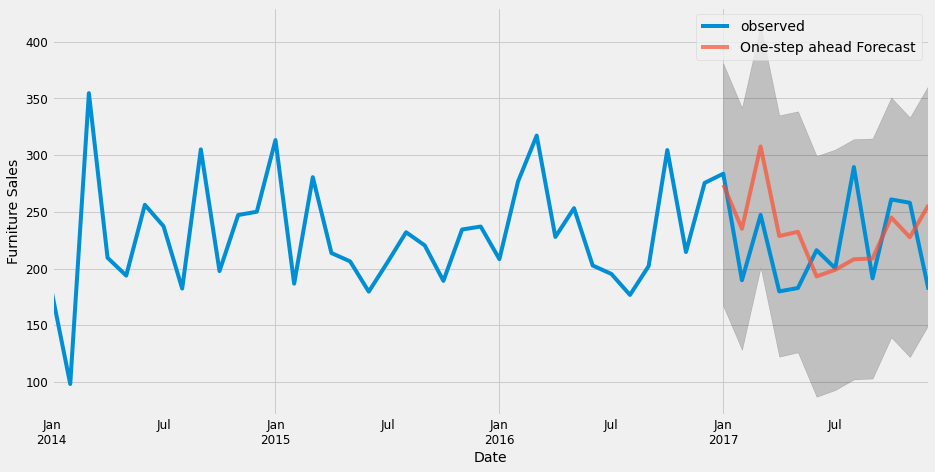

In [20]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

# Error Analysis

In [21]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


# Producing and visualizing forecasts

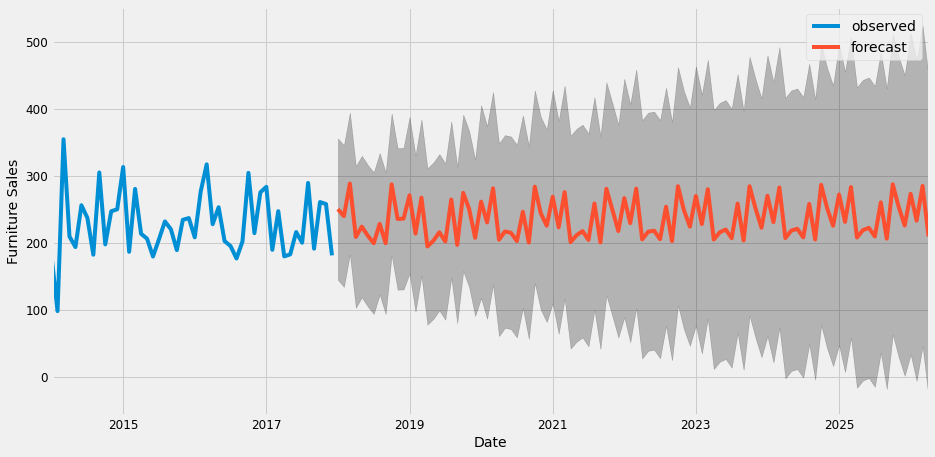

In [22]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Summary